In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

Windows環境なので以下のコマンドは無視(解析に影響はない)

In [2]:
!ls ../input/melbourne-housing-market/Melbourne_housing_extra_data.csv

'ls' は、内部コマンドまたは外部コマンド、
操作可能なプログラムまたはバッチ ファイルとして認識されていません。


入力データの読み込みとデータに含まれる列の表示

In [3]:
dataframe =  pd.read_csv("../input/melbourne-housing-market/Melbourne_housing_extra_data.csv")

In [4]:
dataframe.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

入力データの最初の数行を表示

In [5]:
dataframe.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


Date列をTimestamp型の値に変換

In [6]:
dataframe["Date"] = pd.to_datetime(dataframe["Date"],dayfirst=True)

In [7]:
len(dataframe["Date"].unique())/4
##12 Means a year of Data!

19.5

日単位で集約し、それぞれ標準偏差、数、平均値を求める

In [8]:
var = dataframe[dataframe["Type"]=="h"].sort_values("Date", ascending=False).groupby("Date").std()
count = dataframe[dataframe["Type"]=="h"].sort_values("Date", ascending=False).groupby("Date").count()
mean = dataframe[dataframe["Type"]=="h"].sort_values("Date", ascending=False).groupby("Date").mean()

標準偏差、数、平均を表示(元のカーネルにはなかった部分を追加)

In [9]:
var

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
Date,,,,,,,,,,,,,
2016-01-28,0.707107,NaN,1.555635,0.707107,0.707107,0.707107,1.414214,224.859956,NaN,NaN,0.008910,0.018031,1549.978064
2016-02-04,0.750604,344325.890567,3.603981,64.246074,0.602140,0.597265,1.500487,261.728119,38.148831,35.060570,0.071148,0.098799,3334.689347
2016-04-16,0.980088,640502.812588,3.416518,56.726895,0.861317,0.796430,0.954409,249.235095,72.501216,37.981012,0.058907,0.080411,4238.543163
2016-04-23,0.744174,584520.545569,3.150721,52.261970,0.798957,0.728244,0.962544,4398.984300,64.622087,36.614344,0.054002,0.075256,4864.309546
2016-05-07,0.877106,656124.147904,3.289848,57.427175,0.898668,0.685193,0.901679,453.591580,81.268812,38.044051,0.062505,0.075839,3852.138971
2016-05-14,0.935201,612219.299769,3.368025,56.288721,0.940317,0.797750,0.865140,240.087338,90.399755,38.888382,0.055715,0.077575,4061.528330
2016-05-22,0.893944,690705.583746,3.398941,56.682734,1.033259,0.882981,1.033839,255.267162,93.793536,34.767817,0.060906,0.077738,4010.301144
2016-05-28,0.829708,819656.357710,3.400778,55.032590,0.831667,0.733848,0.983262,374.026009,80.481285,37.555983,0.060667,0.075006,4392.727066
2016-06-04,0.919262,630628.561235,3.359424,59.700675,0.983982,0.763216,0.869724,268.994482,107.379277,38.212662,0.059694,0.081849,3674.132946


In [10]:
count

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
Date,,,,,,,,,,,,,,,,,,,,
2016-01-28,2,2,2,2,1,2,2,2,2,2,2,2,2,1,1,2,2,2,2,2
2016-02-04,24,24,24,24,20,24,24,24,24,19,19,19,19,12,13,24,19,19,24,24
2016-04-16,232,232,232,232,185,232,232,232,232,189,189,189,189,117,132,232,190,190,232,232
2016-04-23,110,110,110,110,88,110,110,110,110,87,87,87,87,48,51,110,87,87,110,110
2016-05-07,283,283,283,283,200,283,283,283,283,231,231,231,231,145,157,283,233,233,283,283
2016-05-14,204,204,204,204,157,204,204,204,204,168,168,168,168,91,105,204,168,168,204,204
2016-05-22,209,209,209,209,160,209,209,209,209,169,169,169,169,103,110,209,172,172,209,209
2016-05-28,292,292,292,292,212,292,292,292,292,236,236,236,236,140,155,292,237,237,292,292
2016-06-04,219,219,219,219,173,219,219,219,219,177,177,177,177,109,126,219,176,176,219,219


In [11]:
mean

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
Date,,,,,,,,,,,,,
2016-01-28,3.500000,1.205000e+06,10.100000,3126.500000,3.500000,1.500000,1.000000,649.000000,198.000000,1910.000000,-37.829800,145.087850,4361.000000
2016-02-04,2.958333,1.068888e+06,10.245833,3091.083333,2.842105,1.368421,1.842105,484.947368,126.333333,1963.076923,-37.834721,144.997153,5622.791667
2016-04-16,3.271552,1.224499e+06,8.964655,3091.806034,3.089947,1.645503,1.645503,481.984127,154.068376,1942.500000,-37.803719,144.989346,7363.405172
2016-04-23,3.181818,1.087059e+06,8.721818,3078.445455,3.034483,1.459770,1.528736,908.218391,145.666667,1941.431373,-37.784748,144.975782,7364.154545
2016-05-07,3.279152,1.285205e+06,8.995760,3099.922261,3.164502,1.627706,1.670996,553.207792,166.137931,1945.369427,-37.816396,144.997093,7151.759717
2016-05-14,3.191176,1.171023e+06,8.664216,3093.058824,3.089286,1.648810,1.577381,460.934524,174.868132,1948.295238,-37.804652,144.992144,7352.269608
2016-05-22,3.330144,1.218111e+06,9.051675,3093.019139,3.165680,1.639053,1.751479,505.349112,175.427184,1948.227273,-37.804988,144.984088,6654.267943
2016-05-28,3.452055,1.366617e+06,9.108219,3102.407534,3.220339,1.665254,1.656780,544.563559,178.414286,1948.051613,-37.807166,144.998750,7195.623288
2016-06-04,3.356164,1.242345e+06,9.271233,3096.415525,3.220339,1.734463,1.700565,513.435028,182.311927,1947.388889,-37.816580,144.993675,6640.922374


日ごとの価格の平均値をプロット

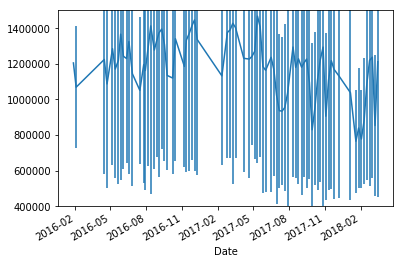

In [12]:
mean["Price"].plot(yerr=var["Price"],ylim=(400000,1500000))


距離が13(km?)以内で家の種類がhのものについて、平均値と標準偏差を算出

In [13]:
means = dataframe[(dataframe["Type"]=="h") & (dataframe["Distance"]<13)].sort_values("Date", ascending=False).groupby("Date").mean()
errors = dataframe[(dataframe["Type"]=="h") & (dataframe["Distance"]<13)].sort_values("Date", ascending=False).groupby("Date").std()

平均に含まれる列を表示

In [14]:
means.columns

Index(['Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude',
       'Propertycount'],
      dtype='object')

平均を取る意味がある列だけを残してプロット

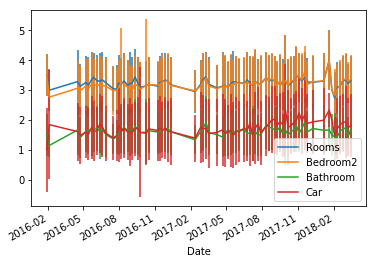

In [15]:
#fig, ax = plt.subplots()
means.drop(["Price",
            "Postcode",
            
           "Longtitude","Lattitude",
           "Distance","BuildingArea", "Propertycount","Landsize","YearBuilt"],axis=1).plot(yerr=errors)

家の種類がhのものについて、日単位で集約し、平均値と標準偏差を算出

In [16]:
dataframe[dataframe["Type"]=="h"].sort_values("Date", ascending=False).groupby("Date").mean()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
Date,,,,,,,,,,,,,
2016-01-28,3.500000,1.205000e+06,10.100000,3126.500000,3.500000,1.500000,1.000000,649.000000,198.000000,1910.000000,-37.829800,145.087850,4361.000000
2016-02-04,2.958333,1.068888e+06,10.245833,3091.083333,2.842105,1.368421,1.842105,484.947368,126.333333,1963.076923,-37.834721,144.997153,5622.791667
2016-04-16,3.271552,1.224499e+06,8.964655,3091.806034,3.089947,1.645503,1.645503,481.984127,154.068376,1942.500000,-37.803719,144.989346,7363.405172
2016-04-23,3.181818,1.087059e+06,8.721818,3078.445455,3.034483,1.459770,1.528736,908.218391,145.666667,1941.431373,-37.784748,144.975782,7364.154545
2016-05-07,3.279152,1.285205e+06,8.995760,3099.922261,3.164502,1.627706,1.670996,553.207792,166.137931,1945.369427,-37.816396,144.997093,7151.759717
2016-05-14,3.191176,1.171023e+06,8.664216,3093.058824,3.089286,1.648810,1.577381,460.934524,174.868132,1948.295238,-37.804652,144.992144,7352.269608
2016-05-22,3.330144,1.218111e+06,9.051675,3093.019139,3.165680,1.639053,1.751479,505.349112,175.427184,1948.227273,-37.804988,144.984088,6654.267943
2016-05-28,3.452055,1.366617e+06,9.108219,3102.407534,3.220339,1.665254,1.656780,544.563559,178.414286,1948.051613,-37.807166,144.998750,7195.623288
2016-06-04,3.356164,1.242345e+06,9.271233,3096.415525,3.220339,1.734463,1.700565,513.435028,182.311927,1947.388889,-37.816580,144.993675,6640.922374


郊外(の地区)(Suburbは郊外の地区名を指していると思われる)、業者ごとに集計した上で、距離が13.7-14(km?)の範囲の家の価格の平均を算出

In [17]:
pd.set_eng_float_format(accuracy=1, use_eng_prefix=True)
dataframe[(dataframe["Type"]=="h") & 
          (dataframe["Distance"]<14) &
          (dataframe["Distance"]>13.7) 
          #&(dataframe["Suburb"] =="Northcote")
         ].sort_values("Date", ascending=False).dropna().groupby(["Suburb","SellerG"]).mean()

Rooms   Price  Distance  Postcode  Bedroom2  \
Suburb            SellerG                                                      
Albion            Barry            2.3  735.0k      13.9      3.0k       2.3   
                  Bells            3.0  782.0k      13.9      3.0k       3.3   
                  Sweeney          3.0  596.5k      13.9      3.0k       3.0   
                  hockingstuart    3.0  730.0k      13.9      3.0k       3.0   
Altona            Barlow           3.0    1.1M      13.8      3.0k       3.0   
                  Compton          2.0  535.6k      13.8      3.0k       2.0   
                  Greg             3.8    1.1M      13.8      3.0k       3.8   
                  hockingstuart    3.0  928.8k      13.8      3.0k       3.0   
Bentleigh East    Beller           3.0  900.0k      13.9      3.2k       3.0   
                  Buxton           3.2    1.2M      13.9      3.2k       3.2   
                  C21              3.3  907.7k      13.9      3.2k       3.3   
                  First            4.0    1.0M      13.9      3.2k       3.0   
                  Gary             4.0    1.4M      13.9      3.2k       4.0   
                  Hodges           4.2    1.3M      13.9      3.2k       4.0   
                  Jellis           3.4    1.3M      13.8      3.2k       3.4   
                  Marshall         4.0    1.4M      13.9      3.2k       4.0   
                  Nick             3.0    1.0M      13.9      3.2k       3.0   
                  RT               4.0    1.2M      13.9      3.2k       4.0   
                  Ray              3.0  896.7k      13.9      3.2k       3.0   
                  Woodards         3.2    1.1M      13.9      3.2k       3.2   
                  hockingstuart    3.7    1.4M      13.9      3.2k       3.7   
Doncaster         Barry            3.6    1.4M      13.9      3.1k       3.6   
                  Fletchers        3.0    1.2M      13.9      3.1k       3.0   
                  Jellis           3.9    1.5M      13.9      3.1k       3.9   
                  Philip           3.5    1.4M      13.9      3.1k       3.5   
                  RW               4.0    1.4M      13.9      3.1k       4.0   
                  Ray              3.4    1.2M      13.9      3.1k       3.3   
                  Vic              3.0    1.1M      13.9      3.1k       3.0   
                  hockingstuart    3.5    1.5M      13.9      3.1k       3.0   
Hampton           Buxton           3.5    2.6M      13.8      3.2k       3.5   
                  Charlton         3.0    1.6M      13.8      3.2k       3.0   
                  Follett          4.0    1.8M      13.8      3.2k       4.0   
                  Hodges           4.0    2.6M      13.8      3.2k       4.0   
                  Marshall         4.0    2.7M      13.8      3.2k       4.0   
                  Nick             3.0    1.4M      13.8      3.2k       3.0   
                  hockingstuart    4.0    2.0M      13.8      3.2k       4.0   
Hampton East      Buxton           3.8    1.4M      13.8      3.2k       3.8   
                  Hodges           3.0  990.0k      13.8      3.2k       3.0   
Templestowe Lower Barry            3.8    1.2M      13.8      3.1k       3.8   
                  Jellis           3.6    1.3M      13.8      3.1k       3.6   
                  Mason            4.0  790.0k      13.8      3.1k       4.0   
                  Philip           3.3    1.0M      13.8      3.1k       3.3   
                  RT               3.0  650.0k      13.8      3.1k       3.0   
                  Zahn             4.0    1.2M      13.8      3.1k       4.0   
                  hockingstuart    4.5  875.0k      13.8      3.1k       4.5   
Viewbank          Barry            3.0  770.0k      13.8      3.1k       3.0   
                  Buckingham       3.0  880.0k      13.8      3.1k       3.0   
                  Darren           4.0    1.0M      13.8      3.1k       4.0   
                  Fletchers      

家の種類がu、地区がNorthcote、部屋数が2つの家についてプロット

C:\Users\MaMto\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\MaMto\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


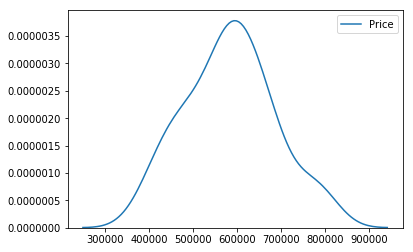

In [18]:
sns.kdeplot(dataframe[(dataframe["Suburb"]=="Northcote")
         & (dataframe["Type"]=="u")
         & (dataframe["Rooms"] == 2)]["Price"])


家の種類がu、距離が8-10、部屋数が2つの家についてプロット

C:\Users\MaMto\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\MaMto\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


(0, 2000000, 0.0, 2.025885815743751e-06)

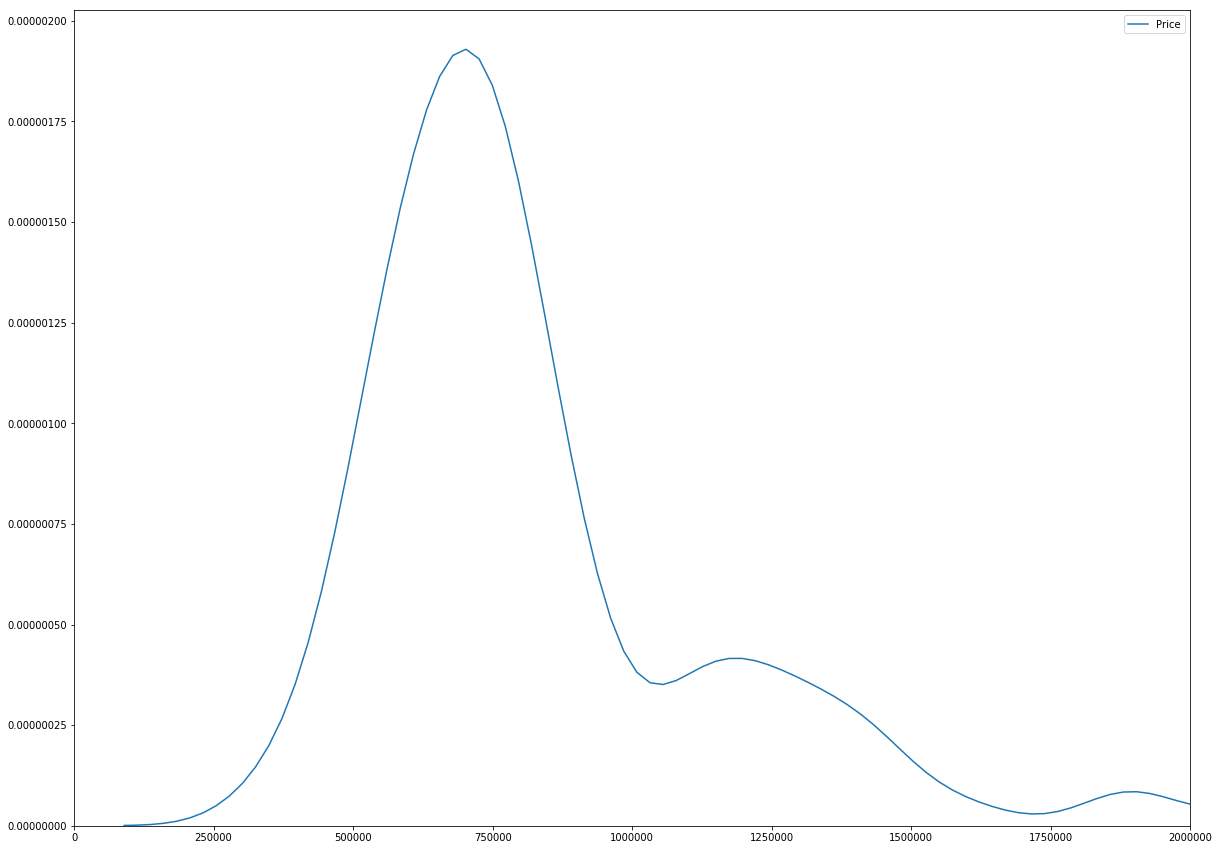

In [19]:
plt.figure(figsize=(20,15))
my_axis = sns.kdeplot(dataframe["Price"][((dataframe["Type"]=="u") &
                                (dataframe["Distance"]>8) &
                                (dataframe["Distance"]<10) &
                                (dataframe["Rooms"] > 2)#&
                                #(dataframe["Price"] < 1000000)
                               )])
my_axis.axis(xmin=0, xmax=2000000)


家の種類がh、部屋数が3,4、価格が1000000(オーストラリアドル？)未満のものについてプロット。部屋の数によって色を分ける。

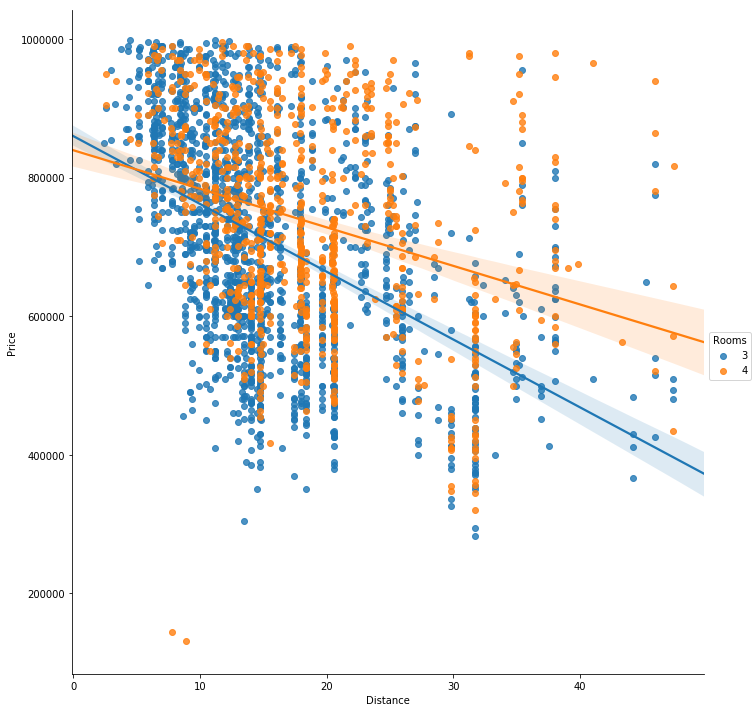

In [20]:
sns.lmplot("Distance","Price",dataframe[(dataframe["Rooms"]<=4) & 
                                         (dataframe["Rooms"]> 2) & 
                                        (dataframe["Type"]=="h") &
                                        (dataframe["Price"]< 1000000)
                                       ].dropna(),hue="Rooms", size=10)

家のタイプがh、部屋数が2、土地の広さが5000未満のものについて、距離と家の広さの平均値をプロット

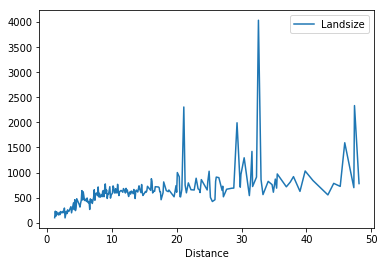

In [21]:
dataframe[(dataframe["Rooms"]>2) & (dataframe["Type"] == "h")& (dataframe["Landsize"] <5000)][["Landsize","Distance"]].dropna().groupby("Distance").mean().plot()

In [22]:
dataframe.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

ペアプロット図を表示

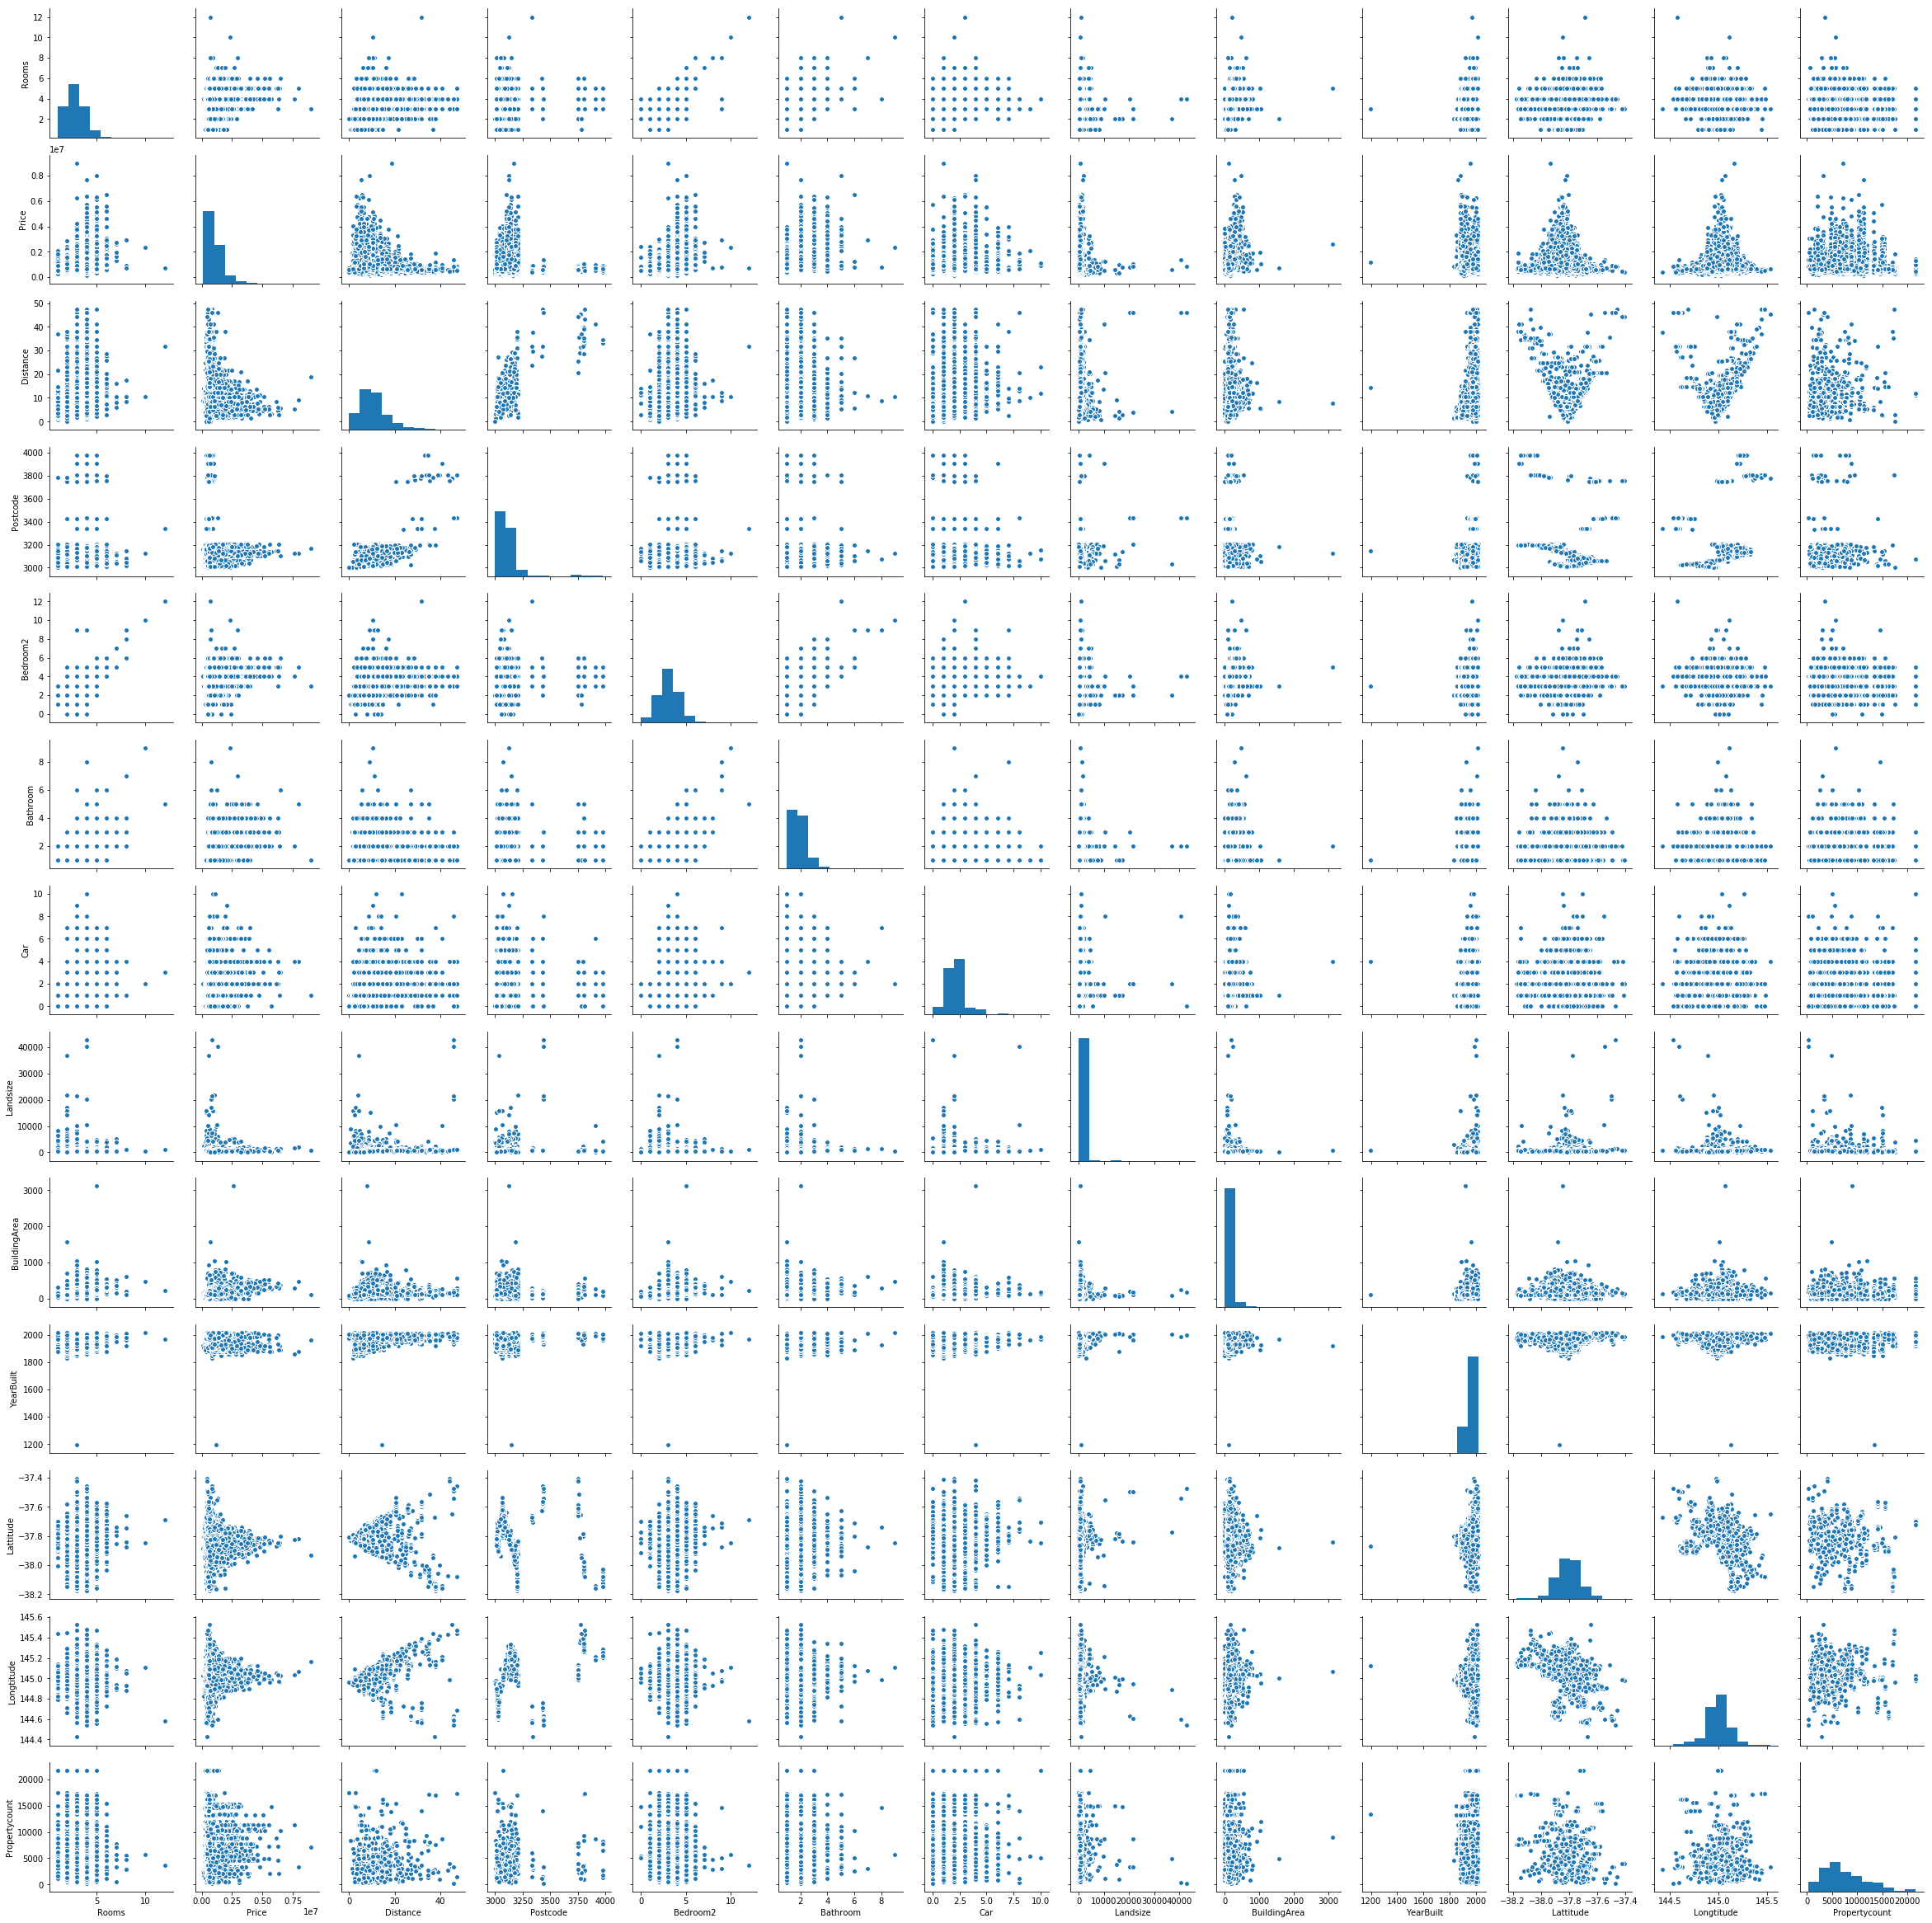

In [23]:
sns.pairplot(dataframe.dropna())

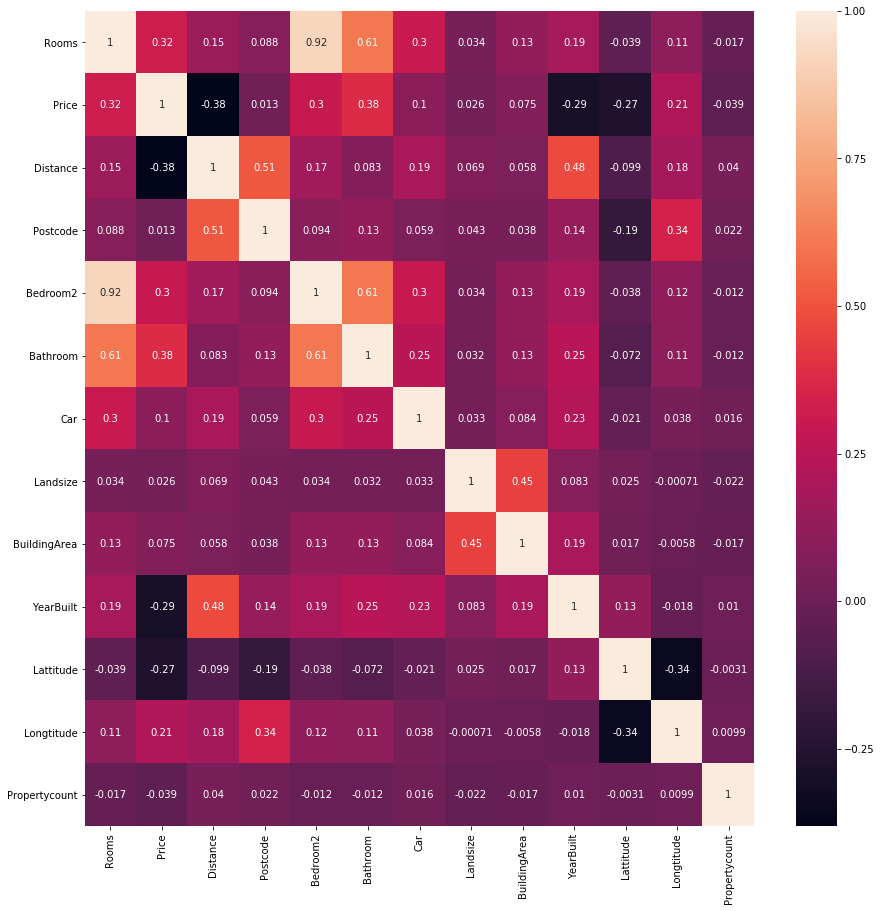

In [24]:
fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(dataframe[dataframe["Type"] == "h"].corr(), annot=True)

(コメント)
相関について
 - 部屋数と寝室の数との相関がとても強い(0.92)
 - 部屋数、寝室、(バスルームorトイレ)の数の間は相関が強い
 - 価格と距離、築年数(yearbuild)、緯度には逆の相関が強い。(距離と築年数は分かる。緯度は位置的に価格の高い地区がある？)

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
dataframe_dr = dataframe.dropna().sort_values("Date")

In [27]:
#dataframe_dr = dataframe_dr[dataframe_dr["Type"]=="h"]

In [28]:
dataframe_dr = dataframe_dr

In [29]:
from datetime import date

In [30]:
all_Data = []

In [31]:
###########
##Find out days since start
days_since_start = [(x - dataframe_dr["Date"].min()).days for x in dataframe_dr["Date"]]

In [32]:
dataframe_dr["Days"] = days_since_start

suburbはカテゴリ変数なので、One-hot表現に変換

In [33]:
#suburb_dummies = pd.get_dummies(dataframe_dr[["Suburb", "Type", "Method"]])
suburb_dummies = pd.get_dummies(dataframe_dr[["Type", "Method"]])
#suburb_dummies = pd.get_dummies(dataframe_dr[[ "Type"]])
#suburb_dummies = pd.get_dummies(dataframe_dr[["Suburb", "Method"]])

訓練データに必要ないと思われる列を落とし、One-hot表現に変換した、suburbをDataFrameに結合する

In [34]:
all_Data = dataframe_dr.drop(["Address","Price","Date", "SellerG","Suburb","Type","Method","CouncilArea","Regionname"],axis=1).join(suburb_dummies)

In [35]:
X = all_Data

目的変数として価格だけ取り出す

In [36]:
y = dataframe_dr["Price"]

訓練データとテストデータに分ける

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [38]:
from sklearn.linear_model import LinearRegression

線形回帰アルゴリズムに訓練データを与えてモデルを作成

In [39]:
lm = LinearRegression()

In [40]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

切片を出力(切片の意味が不明)

In [41]:
print(lm.intercept_)

-124626651.88130601


In [42]:
X.columns

Index(['Rooms', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude',
       'Propertycount', 'Days', 'Type_h', 'Type_t', 'Type_u', 'Method_PI',
       'Method_S', 'Method_SA', 'Method_SP', 'Method_VB'],
      dtype='object')

各変数の係数を出力

In [43]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
ranked_suburbs = coeff_df.sort_values("Coefficient", ascending = False)
ranked_suburbs

,Coefficient
Longtitude,551.1k
Bathroom,205.1k
Rooms,158.0k
Type_h,133.1k
Car,59.4k
Method_S,34.0k
Method_VB,23.4k
Type_t,12.6k
Method_SA,8.3k
BuildingArea,1.8k


テストデータで予測し、予測結果(価格)と実際の価格をプロット
(x軸がモデルにより予測した値、y軸が実際の値)

In [44]:
predictions = lm.predict(X_test)

(200000, 1000000)

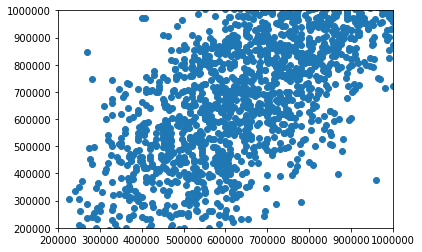

In [45]:
plt.scatter(y_test, predictions)
plt.ylim([200000,1000000])
plt.xlim([200000,1000000])

予測と実際の値の差をプロット

C:\Users\MaMto\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


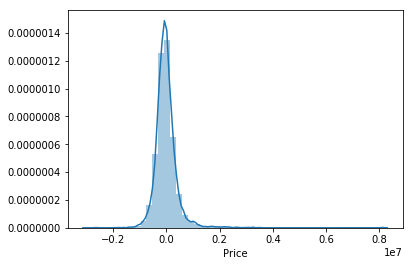

In [46]:
sns.distplot((y_test-predictions),bins=50)

モデルの評価結果を出力

In [47]:
from sklearn import metrics

In [48]:
print("MAE:", metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 268638.2124417339
MSE: 181068099934.79428
RMSE: 425520.9747295593
